In [1]:
import numpy as np

In [2]:
def loadDataSet(fileName):      #general function to parse tab -delimited floats
    dataMat = []                #assume last column is target value
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = list(map(float,curLine)) #map all elements to float()
        dataMat.append(fltLine)
    return dataMat

In [3]:
def calcEuclid(vecA, vecB):
    # 计算欧氏距离
    return np.sqrt(sum(np.power(vecA - vecB, 2)))

In [4]:
def randCent(dataSet, k):
    # 为给定数据集构建一个包含k个随机质心的集合
    # 随机质心必须在整个数据集的边界之内
    n = np.shape(dataSet)[1]
    # 初始化k*n维质心向量
    centroids = np.mat(np.zeros((k,n)))#create centroid mat
    for j in range(n):#create random cluster centers, within bounds of each dimension
        # 通过找到数据集每一维的最小和最大值完成随机质心在整个数据集的边界范围内
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        # np.random.rand(k,1)构建k个随机列向量
        centroids[:,j] = np.mat(minJ + rangeJ * np.random.rand(k,1))
    return centroids

In [5]:
# test
dataSet=np.mat(np.random.randn(3,4))
centroids = randCent(dataSet,2)
print("数据集：")
print(dataSet)
print("质心")
print(centroids)

数据集：
[[ 0.91306527  1.01982096 -1.11621308 -1.11108016]
 [ 0.81589997 -0.51621968 -0.75356534 -0.37097842]
 [-1.32230618  0.15112228 -0.05304554  1.16264958]]
质心
[[-0.84692694  0.5827134  -0.60090534 -0.02840255]
 [-0.16950746  0.1692854  -0.50702073  0.12963725]]


In [6]:
# test
for i in range(np.shape(dataSet)[0]):
    for j in range(2):
        distance = calcEuclid(np.array(centroids[j,:])[0], np.array(dataSet[i,:])[0])
        print(np.array(centroids[j,:])[0],"和",np.array(dataSet[i,:]),"距离为： ",distance)

[-0.84692694  0.5827134  -0.60090534 -0.02840255] 和 [[ 0.91306527  1.01982096 -1.11621308 -1.11108016]] 距离为：  2.1740212670213044
[-0.16950746  0.1692854  -0.50702073  0.12963725] 和 [[ 0.91306527  1.01982096 -1.11621308 -1.11108016]] 距离为：  1.950863772092401
[-0.84692694  0.5827134  -0.60090534 -0.02840255] 和 [[ 0.81589997 -0.51621968 -0.75356534 -0.37097842]] 距离为：  2.0281298153922394
[-0.16950746  0.1692854  -0.50702073  0.12963725] 和 [[ 0.81589997 -0.51621968 -0.75356534 -0.37097842]] 距离为：  1.3237617994316013
[-0.84692694  0.5827134  -0.60090534 -0.02840255] 和 [[-1.32230618  0.15112228 -0.05304554  1.16264958]] 距离为：  1.4597985678073808
[-0.16950746  0.1692854  -0.50702073  0.12963725] 和 [[-1.32230618  0.15112228 -0.05304554  1.16264958]] 距离为：  1.6132212281894518


创建k个质心，然后将每个点分配到最近的质心，再重新计算质心。这个过程重复数次，直到数据点的簇分配结果不再改变为止。

In [76]:
def kMeans(dataSet, k, distMeas=calcEuclid, createCent=randCent):
    # 确定数据集中数据点的总数
    m = np.shape(dataSet)[0]
    # 然后创建一个矩阵存储每个点的簇分配结果
    # 簇结果分配矩阵clusterAssment 包含两列：一列记录簇索引值，第二列存储误差（到质心的距离）
    clusterAssment = np.mat(np.zeros((m,2)))
    centroids = createCent(dataSet, k)
    # 计算质心-分配-重新计算，反复迭代直到所有数据点的簇分配结果不再改变
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        # 遍历所有数据点，找到距离每个点最近的质心
        for i in range(m):#for each data point assign it to the closest centroid
            minDist = np.inf
            minIndex = -1
            # 寻找最近的质心
            for j in range(k):
                distJI = distMeas(np.array(centroids[j,:])[0],np.array(dataSet[i,:])[0])# matrix类型计算时需转换
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            # 如果任一点的簇分配结果发生改变，更新clusterChanged标志
            if clusterAssment[i,0] != minIndex:
                clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        print (centroids)
        # 循环每一个质心，找到属于当前质心的所有点，然后根据这些点去更新当前的质心。
        for cent in range(k):#recalculate centroids
            # 通过数组过滤来获得给定簇的所有点
            # nonzero()返回的是一个二维的数组，其表示非0的元素位置。
            # clusterAssment[:,0].A使matrix类型变为array类型
            ptsInClust = dataSet[np.nonzero(clusterAssment[:,0].A==cent)[0]]#get all the point in this cluster
            # 沿矩阵列方向计算所有点的均值
            centroids[cent,:] = np.mean(ptsInClust, axis=0) #assign centroid to mean
    return centroids, clusterAssment

In [8]:
# test
dataMat = np.mat(loadDataSet('C:\\Users\\ms\\Desktop\\machinelearninginaction\\Ch10\\testSet.txt'))
myCentroids, clustAssing = kMeans(dataMat,4)

[[2.46936704 0.8849468 ]
 [0.47814075 2.62735424]
 [0.65257381 1.46242732]
 [1.36382896 1.46522338]]
[[ 3.00727135 -1.5245645 ]
 [-0.83181724  3.24034614]
 [-3.16464641 -2.665504  ]
 [ 2.42226967  2.88460767]]
[[ 2.80293085 -2.7315146 ]
 [-2.46154315  2.78737555]
 [-3.38237045 -2.9473363 ]
 [ 2.6265299   3.10868015]]


In [9]:
# test
myCentroids

matrix([[ 2.80293085, -2.7315146 ],
        [-2.46154315,  2.78737555],
        [-3.38237045, -2.9473363 ],
        [ 2.6265299 ,  3.10868015]])

In [10]:
# test
clustAssing

matrix([[3.00000000e+00, 2.32019150e+00],
        [1.00000000e+00, 1.39004893e+00],
        [0.00000000e+00, 6.63839104e+00],
        [2.00000000e+00, 4.16140951e+00],
        [3.00000000e+00, 2.76967820e+00],
        [1.00000000e+00, 2.80101213e+00],
        [0.00000000e+00, 5.85909807e+00],
        [2.00000000e+00, 1.50646425e+00],
        [3.00000000e+00, 2.29348924e+00],
        [1.00000000e+00, 6.45967483e-01],
        [0.00000000e+00, 1.74010499e+00],
        [2.00000000e+00, 3.77769471e-01],
        [3.00000000e+00, 2.51695402e+00],
        [1.00000000e+00, 1.38716420e-01],
        [0.00000000e+00, 9.47633071e+00],
        [2.00000000e+00, 9.97310599e+00],
        [3.00000000e+00, 2.39726914e+00],
        [1.00000000e+00, 3.10242360e+00],
        [0.00000000e+00, 4.11084375e-01],
        [2.00000000e+00, 4.74890795e-01],
        [3.00000000e+00, 1.38706133e-01],
        [1.00000000e+00, 5.10240996e-01],
        [0.00000000e+00, 1.05700176e+00],
        [2.00000000e+00, 2.9018182

## 绘图

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
def draw(data,center):
    
    length=len(center)
    fig=plt.figure
    # 绘制原始数据的散点图
    plt.scatter(data[:,0].tolist(),data[:,1].tolist(),s=25,alpha=0.4)
    plt.scatter(center[:,0].tolist(),center[:,1].tolist(),marker='x',c='r')
    # 绘制簇的质心点
    for i in range(length):
        plt.annotate('center',xy=(center[i,0],center[i,1]),xytext=\
        (center[i,0]+1,center[i,1]+1),arrowprops=dict(facecolor='red'))
    plt.show()

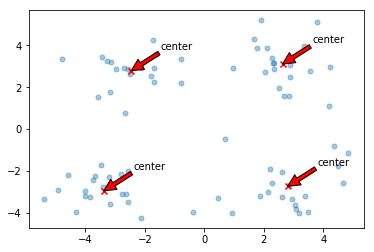

In [12]:
draw(dataMat,myCentroids)

## 使用后处理提高聚类性能

在包含簇分配结果的矩阵中保存着每个点的误差，即点到簇质心的距离平方值，可以利用该误差来评价聚类质量。  
一种用于度量聚类效果的指标是 **SSE** (sum of squared error,误差平方和)，对应上面程序中clusterAssment[:,1]矩阵列的和。SSE越小表示数据点距离质心越近，聚类效果也越好。因为对误差取了平方，因此更加重视远离中心的点。一种肯定可以降低SSE值的方法是增加簇的个数，但这违背了聚类的目标。聚类的目标是 **在保持簇数目不变的情况下提高簇的质量** 。  
为对聚类效果进行改进，可以对生成的簇进行后处理，一种方法是将具有最大SSE值的簇划分成两个簇。具体实现时可以将最大簇包含的点过滤出来并在这些点上运行K-均值算法，其中k设为2.  
当数据的维数较多时，有两种可以量化的方法：**合并最近的质心**， 或者 **合并两个使得SSE增幅最小的质心** 。第一种思路通过计算所有质心之间的距离，然后合并距离最近的两个点来实现。第二种方法需要合并两个簇然后计算总SSE值。必须在所有可能的两个簇上重复上述处理过程，直到找到合并最佳的两个簇为止。

In [77]:
# 二分K-均值算法
def biKmeans(dataSet, k, distMeas=calcEuclid):
    m = np.shape(dataSet)[0]
    # 创建一个矩阵存储数据集每个点的簇分配结果及平方误差
    clusterAssment = np.mat(np.zeros((m,2)))
    # 计算整个数据集的质心(每列的平均值)
    centroid0 = np.mean(dataSet, axis=0).tolist()[0]
    # 使用一个列表保留所有的质心
    centList =[centroid0] #create a list with one centroid
    # 遍历数据集中所有点来计算每个点到质心的误差值（距离）
    for j in range(m):#calc initial Error
        clusterAssment[j,1] = distMeas(centroid0, np.array(dataSet[j,:])[0])**2
    # 循环不停对簇进行划分，直到得到想要的簇数目
    while (len(centList) < k):
        lowestSSE = np.inf  # 将最小SSE设为无穷大
        # 遍历所有的簇来决定最佳的簇划分
        for i in range(len(centList)):
            # 对每个簇，将该簇中的所有点看成一个小的数据集
            ptsInCurrCluster = dataSet[np.nonzero(clusterAssment[:,0].A==i)[0],:]#get the data points currently in cluster i
            centroidMat, splitClustAss = kMeans(ptsInCurrCluster, 2, distMeas)
            sseSplit = sum(splitClustAss[:,1])#compare the SSE to the currrent minimum
            # 剩余数据集的误差
            sseNotSplit = sum(clusterAssment[np.nonzero(clusterAssment[:,0].A!=i)[0],1])
            print ("sseSplit, and notSplit: ",sseSplit,sseNotSplit)
            # 划分误差与剩余误差之和作为本次划分的误差
            if (sseSplit + sseNotSplit) < lowestSSE:
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNotSplit
        # k=2会划分0和1两个编号结果簇，需要将这些簇编号修改为划分簇及新加簇的编号
        bestClustAss[np.nonzero(bestClustAss[:,0].A == 1)[0],0] = len(centList) #change 1 to 3,4, or whatever
        bestClustAss[np.nonzero(bestClustAss[:,0].A == 0)[0],0] = bestCentToSplit
        print ('the bestCentToSplit is: ',bestCentToSplit)
        print ('the len of bestClustAss is: ', len(bestClustAss))
        centList[bestCentToSplit] = bestNewCents[0,:].tolist()[0]#replace a centroid with two best centroids
        centList.append(bestNewCents[1,:].tolist()[0])
        clusterAssment[np.nonzero(clusterAssment[:,0].A == bestCentToSplit)[0],:]= bestClustAss#reassign new clusters, and SSE
    return np.mat(centList), clusterAssment


In [66]:
# test
dataMat3 = np.mat(loadDataSet('C:\\Users\\ms\\Desktop\\machinelearninginaction\\Ch10\\testSet2.txt'))
centList, myNewAssments = biKmeans(dataMat3,3)

[[ 2.62171665 -2.65821745]
 [ 0.9637979  -2.37542384]]
[[ 3.60741267  2.87726275]
 [-1.0990066   0.81234696]]
[[ 2.93386365  3.12782785]
 [-1.70351595  0.27408125]]
[[3.13759123 1.44234054]
 [2.26194516 2.56527079]]
[[3.3570382  1.8464974 ]
 [2.79280547 3.554938  ]]
[[3.1604785  1.93671333]
 [2.836743   3.6383055 ]]
[[ 0.56974951 -3.80877265]
 [-4.05265276  3.55423882]]
[[-0.45965615 -2.7782156 ]
 [-2.94737575  3.3263781 ]]


In [67]:
# 质心结果
centList

matrix([[ 2.93386365,  3.12782785],
        [-0.45965615, -2.7782156 ],
        [-2.94737575,  3.3263781 ]])

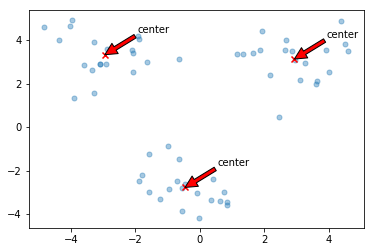

In [68]:
draw(dataMat3,centList)

-------------


# 示例：对地图上的点进行聚类

portlanClub.txt包含70个地址信息，在一定时间内要去这70个地方，需要决定一个将这些地方进行聚类的最佳策略，这样就可以安排交通工具抵达这些簇的质心，然后步行到每个簇内地址。该txt文件中虽然有地址，但并没有给出这些地址之间的距离远近信息。因此，要得到每个地址的经度和纬度，然后对这些地址进行聚类以安排行程。

#### Yahoo!PlaceFinder &emsp;API

雅虎为我们提供了一个免费的地址转换API，该API对给定的地址返回改地址对应的经纬度。

In [29]:
import urllib
import json
def geoGrab(stAddress, city):
    apiStem = 'http://where.yahooapis.com/geocode?'  #create a dict and constants for the goecoder
    params = {}
    params['flags'] = 'J'#JSON return type
    params['appid'] = 'aaa0VN6k'
    params['location'] = '%s %s' % (stAddress, city)
    url_params = urllib.parse.urlencode(params)
    yahooApi = apiStem + url_params      #print url_params
    print (yahooApi)
    c=urllib.request.urlopen(yahooApi)
    return json.loads(c.read())

In [30]:
from time import sleep
def massPlaceFind(fileName):
    fw = open('C:\\Users\ms\Desktop\machinelearninginaction\Ch10\places.txt', 'w')
    for line in open(fileName).readlines():
        line = line.strip()
        lineArr = line.split('\t')
        retDict = geoGrab(lineArr[1], lineArr[2])
        if retDict['ResultSet']['Error'] == 0:
            lat = float(retDict['ResultSet']['Results'][0]['latitude'])
            lng = float(retDict['ResultSet']['Results'][0]['longitude'])
            print ("%s\t%f\t%f" % (lineArr[0], lat, lng))
            fw.write('%s\t%f\t%f\n' % (line, lat, lng))
            
        else: print ("error fetching")
        sleep(1)
    fw.close()

In [32]:
# test
# 此处雅虎服务器异常不再演示
geoResults = geoGrab( '10860 SW Beaverton-Hillsdale Hwy', 'Beaverton, OR')

## 对地理坐标进行聚类

### 利用球面余弦定理返回地球表面两点间的距离

In [78]:
def distSLC(vecA, vecB):#Spherical Law of Cosines
    a = np.sin(vecA[1]*np.pi/180) * np.sin(vecB[1]*np.pi/180)
    b = np.cos(vecA[1]*np.pi/180) * np.cos(vecB[1]*np.pi/180) * np.cos(np.pi * (vecB[0]-vecA[0]) /180)
    return np.arccos(a + b)*6371.0 #pi is imported with numpy

In [79]:
import matplotlib.pyplot as plt
def clusterClubs(numClust=5):
    datList = []
    for line in open('C:\\Users\ms\Desktop\machinelearninginaction\Ch10\places.txt').readlines():
        lineArr = line.strip().split('\t')
        datList.append([float(lineArr[4]), float(lineArr[3])])
    datMat = np.mat(datList)
    myCentroids, clustAssing = biKmeans(datMat, numClust, distMeas=distSLC)
    fig = plt.figure()
    rect=[0.1,0.1,0.8,0.8]
    scatterMarkers=['s', 'o', '^', '8', 'p', \
                    'd', 'v', 'h', '>', '<']
    axprops = dict(xticks=[], yticks=[])
    ax0=fig.add_axes(rect, label='ax0', **axprops)
    
    """
    在特定的图上绘图
    """
    imgP = plt.imread('C:\\Users\ms\Desktop\machinelearninginaction\Ch10\Portland.png')
    ax0.imshow(imgP)
    ax1=fig.add_axes(rect, label='ax1', frameon=False)
    for i in range(numClust):
        ptsInCurrCluster = datMat[np.nonzero(clustAssing[:,0].A==i)[0],:]
        markerStyle = scatterMarkers[i % len(scatterMarkers)]
        ax1.scatter(ptsInCurrCluster[:,0].flatten().A[0], ptsInCurrCluster[:,1].flatten().A[0], marker=markerStyle, s=90)
    ax1.scatter(myCentroids[:,0].flatten().A[0], myCentroids[:,1].flatten().A[0], marker='+', s=300)
    plt.show()

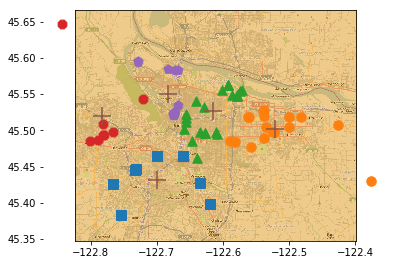

In [80]:
clusterClubs(5)